In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('github_profiles.csv')
df2 = pd.read_csv('github_profiles2.csv')
df3 = pd.read_csv('github_profiles3.csv')

df_combined = pd.concat([df1, df2, df3], ignore_index=True)


In [4]:
df_combined.to_csv('combined_profiles.csv', index=False)

In [4]:
print("Info:")
df_combined.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Login        2856 non-null   object 
 1   ID           2856 non-null   int64  
 2   Name         2510 non-null   object 
 3   Email        1468 non-null   object 
 4   Twitter      562 non-null    object 
 5   Followers    2856 non-null   int64  
 6   Following    2856 non-null   int64  
 7   No of Repos  2856 non-null   int64  
 8   Fork_avg     2856 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 200.9+ KB


In [9]:
df_combined.head()

,Login,ID,Name,Email,Twitter,Followers,Following,No of Repos,Fork_avg
0,mojombo,1,Tom Preston-Werner,tom@mojombo.com,mojombo,23927,11,66,75.966667
1,defunkt,2,Chris Wanstrath,NaN,NaN,22311,215,107,51.400000
2,pjhyett,3,PJ Hyett,pj@hyett.com,NaN,8291,30,8,18.125000
3,wycats,4,Yehuda Katz,wycats@gmail.com,wycats,10200,13,293,3.266667
4,ezmobius,5,Ezra Zygmuntowicz,NaN,NaN,555,13,22,9.000000


In [10]:
df_combined.columns

Index(['Login', 'ID', 'Name', 'Email', 'Twitter', 'Followers', 'Following',
       'No of Repos', 'Fork_avg'],
      dtype='object')

In [12]:
df_selected = df_combined[['Followers', 'Following', 'No of Repos', 'Fork_avg']]

print(df_selected)

      Followers  Following  No of Repos   Fork_avg
0         23927         11           66  75.966667
1         22311        215          107  51.400000
2          8291         30            8  18.125000
3         10200         13          293   3.266667
4           555         13           22   9.000000
...         ...        ...          ...        ...
2851        190         10           31   1.466667
2852         12         14           24   0.041667
2853         44         17           72   0.166667
2854          9          8          108   0.033333
2855         37          6           59   0.166667

[2708 rows x 4 columns]


In [14]:
null_counts = df_selected.isnull().sum()

print("Null Values in Each Column:")
print(null_counts)

print("\nRows with Any Null Values:")
print(df_selected[df_selected.isnull().any(axis=1)])

Null Values in Each Column:
Followers      0
Following      0
No of Repos    0
Fork_avg       0
dtype: int64

Rows with Any Null Values:
Empty DataFrame
Columns: [Followers, Following, No of Repos, Fork_avg]
Index: []


In [8]:
duplicates = df_combined[df_combined.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Login, ID, Name, Email, Twitter, Followers, Following, No of Repos, Fork_avg]
Index: []


In [6]:
df_combined = df_combined.drop_duplicates()

In [7]:
print("\nDescriptive Statistics:")
print(df_combined.describe())


Descriptive Statistics:
                ID     Followers    Following  No of Repos     Fork_avg
count  2708.000000   2708.000000  2708.000000  2708.000000  2708.000000
mean   1495.225997    223.262925    31.434638    53.951994     1.665323
std     849.000031   1312.334456   132.913149    89.489200     6.420414
min       1.000000      0.000000     0.000000     0.000000     0.000000
25%     728.750000      9.000000     1.000000     8.000000     0.000000
50%    1520.500000     32.000000     7.000000    29.000000     0.272727
75%    2228.250000     93.000000    27.000000    67.250000     0.966667
max    2944.000000  31290.000000  4830.000000  1556.000000   149.100000


Outliers in Selected Columns:
      Followers  Following  No of Repos   Fork_avg
0         23927         11           66  75.966667
1         22311        215          107  51.400000
2          8291         30            8  18.125000
3         10200         13          293   3.266667
4           555         13           22   9.000000
...         ...        ...          ...        ...
2821       2992         15          108   7.333333
2837         46          3           15   8.266667
2841        634        148           24   0.291667
2843        716        173           87   7.333333
2845        806        103          101   1.566667

[759 rows x 4 columns]


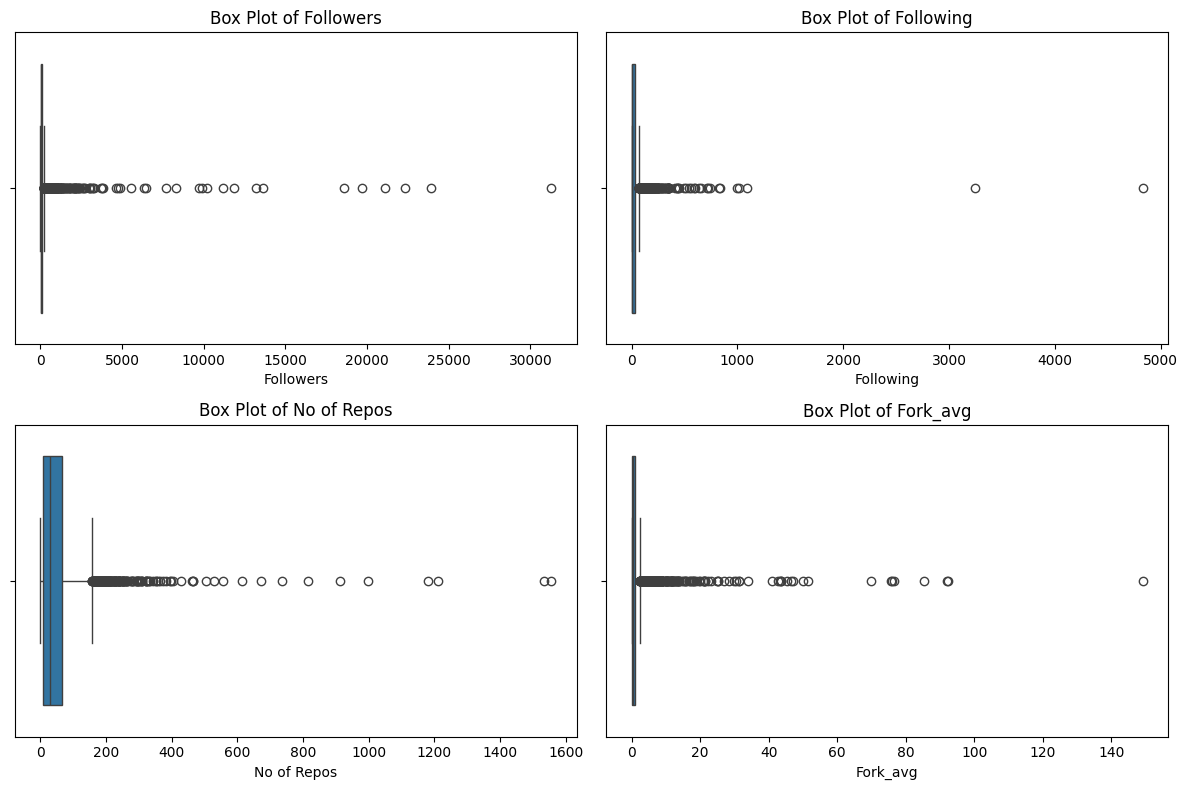

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_selected = df_combined[['Followers', 'Following', 'No of Repos', 'Fork_avg']]

Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df_selected < lower_bound) | (df_selected > upper_bound)

print("Outliers in Selected Columns:")
print(df_selected[outliers.any(axis=1)])

plt.figure(figsize=(12, 8))

for i, column in enumerate(df_selected.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_selected[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

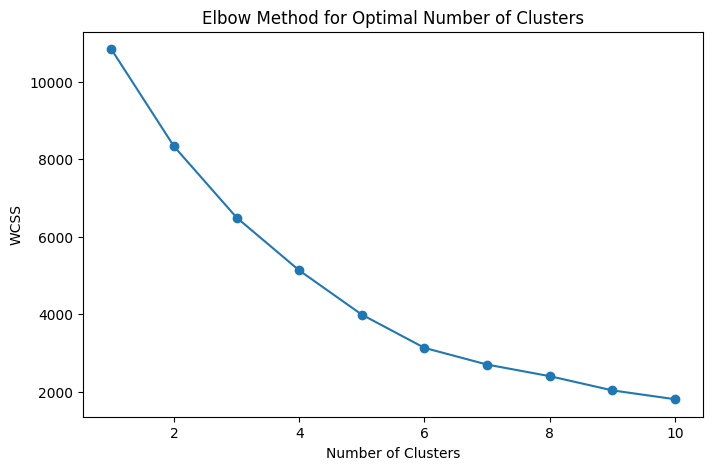

Data with Cluster Labels:
   Followers  Following  No of Repos   Fork_avg  Cluster
0      23927         11           66  75.966667        2
1      22311        215          107  51.400000        2
2       8291         30            8  18.125000        2
3      10200         13          293   3.266667        2
4        555         13           22   9.000000        0


/var/folders/f0/kw1r0nnj7l7ddgdtrwxqtrt40000gn/T/ipykernel_66836/222517733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(df_scaled)


In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)

X_train, X_test, y_train, y_test = train_test_split(df_selected.drop('Cluster', axis=1), df_selected['Cluster'], test_size=0.3, random_state=0)

print("Data with Cluster Labels:")
print(df_selected.head())

In [19]:
optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_combined['kmeans'] = kmeans.fit_predict(df_scaled)

print("Data with Cluster Labels:")
print(df_combined.head())

Data with Cluster Labels:
      Login  ID                Name             Email  Twitter  Followers  \
0   mojombo   1  Tom Preston-Werner   tom@mojombo.com  mojombo      23927   
1   defunkt   2     Chris Wanstrath               NaN      NaN      22311   
2   pjhyett   3            PJ Hyett      pj@hyett.com      NaN       8291   
3    wycats   4         Yehuda Katz  wycats@gmail.com   wycats      10200   
4  ezmobius   5   Ezra Zygmuntowicz               NaN      NaN        555   

   Following  No of Repos   Fork_avg  k2  kmeans  
0         11           66  75.966667   1       1  
1        215          107  51.400000   1       1  
2         30            8  18.125000   1       1  
3         13          293   3.266667   1       1  
4         13           22   9.000000   0       0  


In [26]:
df_combined['kmeans'].value_counts()

kmeans
0    2824
1      32
Name: count, dtype: int64

Confusion Matrix:
[[848   0]
 [  5   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       848
           1       1.00      0.44      0.62         9

    accuracy                           0.99       857
   macro avg       1.00      0.72      0.81       857
weighted avg       0.99      0.99      0.99       857


Test Data with True and Predicted Labels:
   Followers  Following  No of Repos  Fork_avg  True Label  Predicted Label
0  -0.169994  -0.237763    -0.607069 -0.262312         NaN                0
1  -0.108356   0.757416    -0.438060  0.030290         1.0                0
2  -0.148147  -0.191476     1.071746 -0.225737         NaN                0
3   2.409448  -0.114330     0.305576 -0.100336         NaN                0
4  -0.148147  -0.052614     0.001361 -0.241412         0.0                0


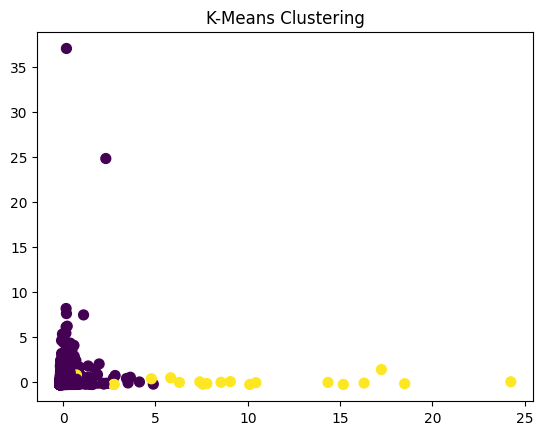

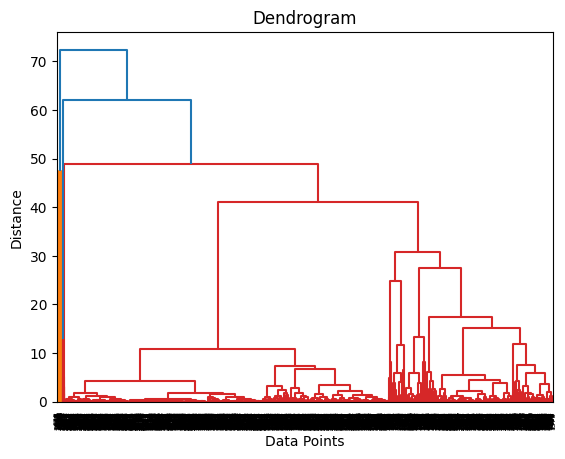

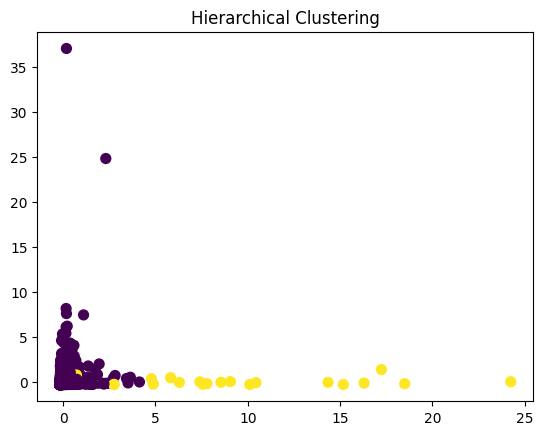

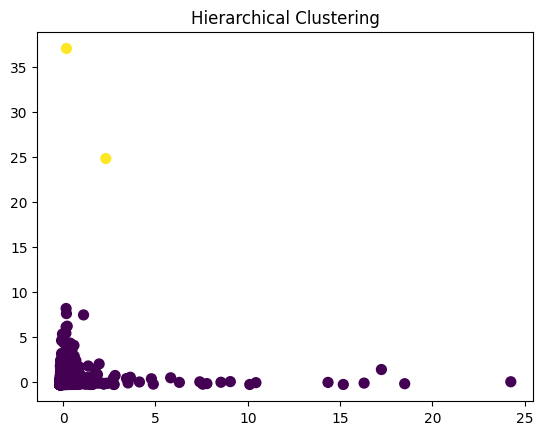

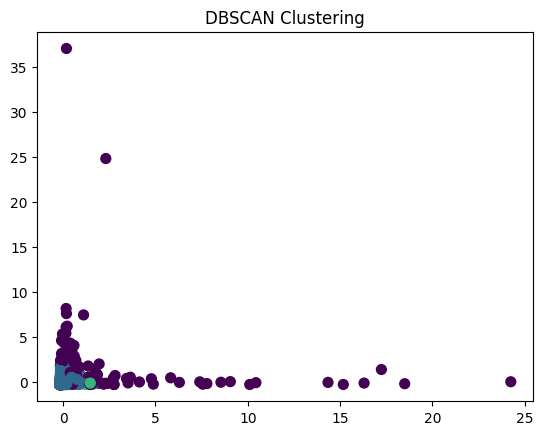

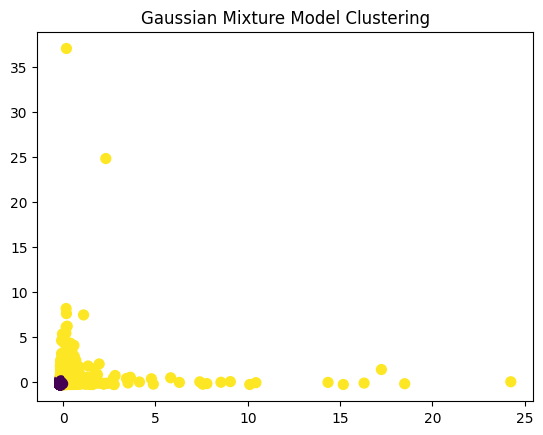

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import joblib

df1 = pd.read_csv('github_profiles.csv')
df2 = pd.read_csv('github_profiles2.csv')
df3 = pd.read_csv('github_profiles3.csv')

df_combined = pd.concat([df1, df2, df3], ignore_index=True)

df_selected = df_combined[['Followers', 'Following', 'No of Repos', 'Fork_avg']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_combined['kmeans'] = kmeans.fit_predict(df_scaled)
joblib.dump(kmeans, 'kmeans_model.pkl')

X = df_scaled
y = df_combined['kmeans']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
joblib.dump(knn, 'knn_model.pkl')

y_pred = knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

df_test = pd.DataFrame(X_test, columns=['Followers', 'Following', 'No of Repos', 'Fork_avg'])
df_test['True Label'] = y_test
df_test['Predicted Label'] = y_pred

print("\nTest Data with True and Predicted Labels:")
print(df_test.head())

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_selected)
joblib.dump(scaler, 'scaler.pkl')

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df_combined['Cluster'] = clusters

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X_scaled)

df_combined['Cluster_HC'] = clusters_hc

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_hc, s=50, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

hc = AgglomerativeClustering(n_clusters=2,  metric='euclidean', linkage='average')
clusters_hc = hc.fit_predict(X_scaled)

df_combined['Cluster_HC'] = clusters_hc

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_hc, s=50, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

df_combined['Cluster_DBSCAN'] = clusters_dbscan

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

gmm = GaussianMixture(n_components=2, random_state=0)
clusters_gmm = gmm.fit_predict(X_scaled)
joblib.dump(gmm, 'gmm_model.pkl')

df_combined['Cluster_GMM'] = clusters_gmm

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()




In [9]:
df_combined.describe()

,ID,Followers,Following,No of Repos,Fork_avg,kmeans,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_GMM
count,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000
mean,1487.976891,219.876401,30.820028,53.879202,1.673433,0.011204,0.011204,0.000700,-0.041317,0.224440
std,855.757862,1281.897345,129.647615,88.768621,6.380669,0.105275,0.105275,0.026458,0.236084,0.417286
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,714.750000,9.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1511.500000,32.000000,7.000000,29.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2226.250000,94.000000,26.000000,67.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2944.000000,31290.000000,4830.000000,1556.000000,149.100000,1.000000,1.000000,1.000000,2.000000,1.000000


In [232]:
df_combined.to_csv('combined_file.csv', index=False)

In [12]:
df_combined.describe()

,ID,Followers,Following,No of Repos,Fork_avg,kmeans,Cluster,Cluster_HC,Cluster_DBSCAN,Cluster_GMM
count,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000,2856.000000
mean,1487.976891,219.876401,30.820028,53.879202,1.673433,0.011204,0.011204,0.000700,-0.041317,0.224440
std,855.757862,1281.897345,129.647615,88.768621,6.380669,0.105275,0.105275,0.026458,0.236084,0.417286
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,714.750000,9.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1511.500000,32.000000,7.000000,29.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2226.250000,94.000000,26.000000,67.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2944.000000,31290.000000,4830.000000,1556.000000,149.100000,1.000000,1.000000,1.000000,2.000000,1.000000


In [310]:
beginner_user_value = [[0, 0, 2, 0]]

user_results = scaler.transform(beginner_user_value)

gmm.predict(beginner_user_value)

/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [223]:
advanced_user_value = [[31290, 4830, 1556, 149]]

user_results = scaler.transform(advanced_user_value)

gmm.predict(advanced_user_value)

/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [264]:
beginner_user_value = [[2, 0, 65, 0]]

user_results = scaler.transform(beginner_user_value)

kmeans.predict(beginner_user_value)

/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [175]:
beginner_user_value = [[31290, 4830, 1556, 149]]

user_results = scaler.transform(beginner_user_value)

kmeans.predict(beginner_user_value)

/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [200]:
beginner_user_value = [[0, 0, 0, 0]]

user_results = scaler.transform(beginner_user_value)

dbscan.transform(beginner_user_value)

/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


AttributeError: 'DBSCAN' object has no attribute 'transform'

In [176]:
beginner_user_value = [[0, 0, 0, 0]]

user_results = scaler.transform(beginner_user_value)

hc.predict(beginner_user_value)

/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [282]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

df1 = pd.read_csv('github_profiles.csv')
df2 = pd.read_csv('github_profiles2.csv')
df3 = pd.read_csv('github_profiles3.csv')

df_combined = pd.concat([df1, df2, df3], ignore_index=True)

df_selected = df_combined[['Followers', 'Following', 'No of Repos', 'Fork_avg']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_combined['kmeans'] = kmeans.fit_predict(df_scaled)
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [283]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

X = df_scaled
y = df_combined['kmeans']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

joblib.dump(knn, 'knn_model.pkl')

y_pred = knn.predict(X_test)
print(y_pred)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [291]:
y_pred = knn.predict([[0, 0, 0, 0]])
print(y_pred)

[0]


In [272]:
y_pred = knn.predict([[31290, 4830, 1556, 149]])
print(y_pred)

[1]


In [295]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import joblib

df1 = pd.read_csv('github_profiles.csv')
df2 = pd.read_csv('github_profiles2.csv')
df3 = pd.read_csv('github_profiles3.csv')

df_combined = pd.concat([df1, df2, df3], ignore_index=True)

df_selected = df_combined[['Followers', 'Following', 'No of Repos', 'Fork_avg']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

dbscan = DBSCAN(eps=0.5, min_samples=2)
df_combined['dbscan'] = dbscan.fit_predict(df_scaled)

joblib.dump(dbscan, 'dbscan_model.pkl')

X = df_scaled
y = df_combined['dbscan']

if -1 in y.unique():
    print("Noise points found (-1 label). Consider adjusting DBSCAN parameters if needed.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

joblib.dump(knn, 'knn_model.pkl')

y_pred = knn.predict(X_test)
print(y_pred)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Noise points found (-1 label). Consider adjusting DBSCAN parameters if needed.
[ 0  0  0  0  0  0  0  0  0 -1  0 11  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  3  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kiranmulawad/bdp_project_py/code/python_project/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

In [294]:
y_pred = knn.predict([[0, 0, 90, 0]])
print(y_pred)

[-1]


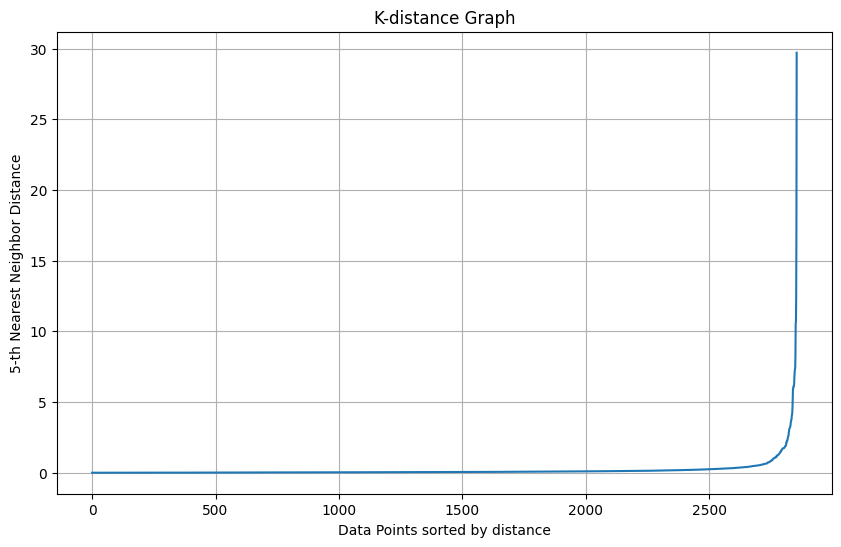

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

min_samples = 5
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(df_scaled)
distances, indices = nearest_neighbors.kneighbors(df_scaled)

distances = np.sort(distances[:, min_samples - 1])

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()
